In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
X = pd.read_csv("q1/linearX.csv", header = None)
Y = pd.read_csv("q1/linearY.csv", header = None)
X.columns = ["x1"]
Y.columns = ["y"]
X["x0"] = 1
x_mean = np.mean(X["x1"])
x_std = np.std(X["x1"])
X["x1"] = (X["x1"] - x_mean)/x_std
X_data = X.to_numpy()
Y_data = Y.to_numpy()

In [3]:
data = pd.concat([X,Y], axis = 1, join = "inner")

In [4]:
# helper function
# returns the predicted values given the x values and parameters
def hypothesis(x, theta):
  return np.dot(x, theta)

# helper function
# returns the mean squared error given the predictions and y values
def mse(y_pred, y):
  return np.sum(np.square(y-y_pred))

In [5]:
def gradient_descent(X, Y, learning_rate, stopping_criteria, theta_init):

  # initialising parameters
  theta = theta_init

  # initialising variables
  J_1 = mse(np.dot(X_data, theta), Y_data)
  mse_list = [J_1]
  del_J = 100000
  v = 0
  iteration = 0
  theta_list = theta
  
  # gradient descent runs until change in J(ϑ) is less than stopping criteria
  while(del_J > stopping_criteria): 
    
    iteration += 1

    # calculating the gradient of J(ϑ)
    v = np.dot(X_data.T, np.dot(X_data, theta)-Y_data)

    # updating parameters
    theta = theta - (learning_rate*v)/X_data.shape[0]

    J_1 = mse(np.dot(X_data, theta), Y_data)
    del_J = abs(J_1-mse_list[-1])
    mse_list.append(J_1)
    theta_list = np.append(theta_list, theta, axis = 1)

  # returns
  # theta : the final parameter vector
  # theta_list : list of parameter vectors after at each iteration
  # mse_list : list of values of J(ϑ) at each iteration
  print(J_1)
  return (theta, theta_list, mse_list)

In [6]:
theta, mse_list, theta_list = gradient_descent(X_data, Y_data, 0.1, 0.00000001, np.zeros((2,1)))

0.00023899520282623382


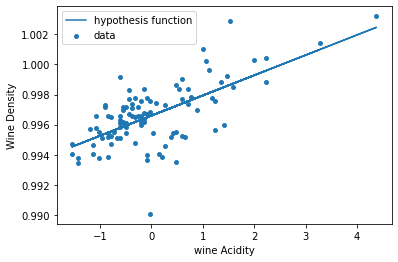

In [7]:
y_pred = hypothesis(X_data, theta)
y_pred = np.reshape(y_pred, (100, ))
plt.scatter(X["x1"], Y["y"], s = 15, label = "data")
plt.plot(X["x1"], y_pred, label = "hypothesis function")
plt.legend()
plt.xlabel("wine Acidity")
plt.ylabel("Wine Density")
plt.show()

In [8]:
def f(a,b):
  sum = 0
  for i in range(0, X.shape[0]):
      sum = sum + (Y_data[i] - a*X_data[i][0] - b*X_data[i][1])**2
  return sum

a = np.linspace(-1, 1, 300)
b = np.linspace(0, 2, 300)

A, B = np.meshgrid(a,b)
C = f(A, B)

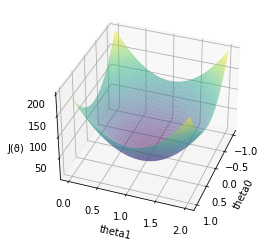

In [9]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.plot_surface(A, B, C, alpha = 0.5, cmap = "viridis")
ax.view_init(35, 20)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(ϑ)')



theta0_list = theta_list[0]
theta1_list = theta_list[1]
theta0 = []
theta1 = []
J = []

graph = ax.scatter(theta0, theta1, J)

def animation_builder(i):
  theta0 = [theta0_list[i]]
  theta1 = [theta1_list[i]]
  J = [mse_list[i]]
  graph._offsets3d = (theta0, theta1, J)
  return graph

animation = FuncAnimation(fig, animation_builder, frames = np.arange(0, 50), interval = 200, blit = False)

plt.show(block = False)
plt.pause(20)
plt.close()

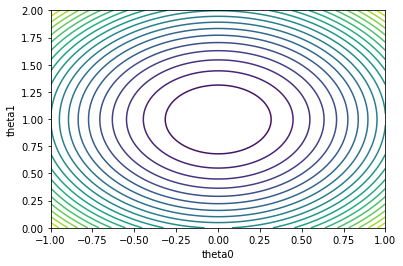

In [10]:
fig = plt.figure()
ax = plt.axes()
ax.contour(A, B, C, 20)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")

# plt.show()

theta0_list = theta_list[0]
theta1_list = theta_list[1]
# print(theta1_list)
theta0 = []
theta1 = []

graph = ax.scatter(theta0, theta1)

def animation_builder(i):
  graph._offsets = np.array([[theta0_list[i], theta1_list[i]]])
  return graph

animation = FuncAnimation(fig, animation_builder, frames = np.arange(0, 50), interval = 200, blit = False)

plt.show(block = False)
plt.pause(20)
plt.close()
